In [5]:
# import the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('2023-ds-salary.csv') #load data into a DataFrame object:
print(df.info()) #display the basic information of the spreadsheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [7]:
print(df.head(5)) #display the first 5 rows for a quick overview
# Clearly, we see that there are 11 columns and the data types agree with the above cell

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [11]:
# Basic analysis for the number of employees at different office locations

count = df['company_location'].value_counts() # number of employess at each office location
print(count,"\n") #The length: 72 is the number of different office locations

# Create data set for the five largest offices and group other offices as 'other'
df_US=df[df['company_location'] =='US']
df_GB=df[df['company_location'] =='GB']
df_CA=df[df['company_location'] =='CA']
df_ES=df[df['company_location'] =='ES']
df_IN=df[df['company_location'] =='IN']
df_other=df[~df['company_location'].isin(['US', 'GB', 'CA', 'ES', 'IN'])]

vals=[count[i] for i in range (5)]
vals.append(len(df_other))
loc=['US', 'GB', 'CA', 'ES', 'IN','Others']

# Create a data frame for the employee distribution
data_em = {'location':loc, 'no_of_employees': vals} #Original dictionary format
df_em = pd.DataFrame(data_em) # Convert to a data frame by pandas
print(df_em) # Print the data frame format

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64 

  location  no_of_employees
0       US             3040
1       GB              172
2       CA               87
3       ES               77
4       IN               58
5   Others              321


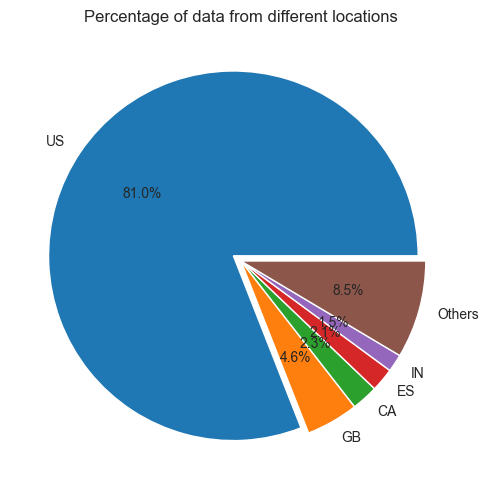

In [12]:
# Using seaborn to plot a pie chart

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_em['no_of_employees'], labels=df_em['location'], autopct='%1.1f%%',explode=[0.05,0,0,0,0,0])
plt.title('Percentage of data from different locations')
plt.show()

# Can also plot pie chart directly from pandas from the following command
# df_em.plot(kind='pie', title='Percentage of data from different locations', labels=df_em['location'], y='no_of_employees', figsize=(5,5),autopct='%.1f%%') # Plot a pie chart

   work_year         US         GB         CA        ES        IN    others
0       2020  145949.59  103225.25   66052.00  59304.50  14219.67  63306.72
1       2021  134969.23   79003.53  108410.55  51331.40  29645.32  64790.71
2       2022  147990.16   84533.63  126009.55  47997.34  43043.68  68000.65
3       2023  156949.57   90798.62  148996.00  74555.21  21031.73  85924.39 



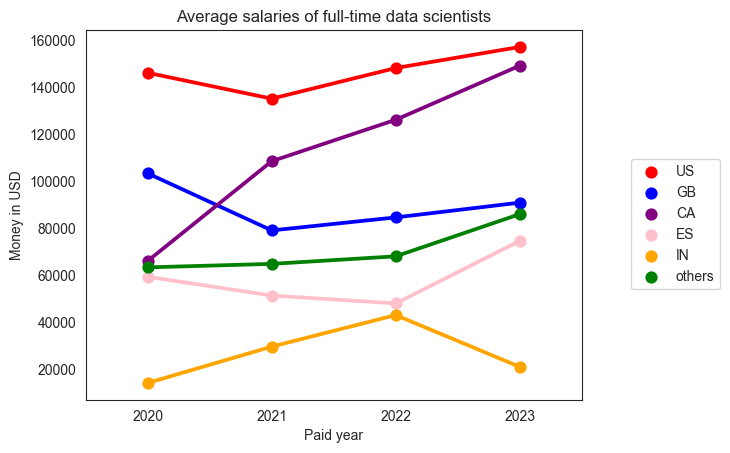

In [183]:
# Comparison between average paid (round to 2 decimal places) for full-time employees

# Important point: Data format, difference between series and data frame
# Comment: Use ['salary_in_usd] to have a pandas series with shape (2,) with name salary_in_usd, then rename the series by each location
# Comment: Use [['salary_in_usd]] if we want to have pandas data frame directly
# Comment: Concatenate the pandas series and then reset the index to have pandas data frame

mean_US_FT=df_US[df_US['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('US')
mean_GB_FT=df_GB[df_GB['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('GB')
mean_CA_FT=df_CA[df_CA['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('CA')
mean_ES_FT=df_ES[df_ES['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('ES')
mean_IN_FT=df_IN[df_IN['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('IN')
mean_other_FT=df_other[df_other['employment_type'] =='FT'].groupby('work_year')['salary_in_usd'].mean().rename('others')

# Combine the above results to a single data frame, and round off to 2 decimal points
mean_overall_FT = pd.concat([mean_US_FT, mean_GB_FT, mean_CA_FT, mean_ES_FT, mean_IN_FT, mean_other_FT],axis=1, join='inner').round(2).reset_index()
print(mean_overall_FT, "\n") # print the data set of average salaries for different locations in different years

# Use seaborn to plot a pointplot (better than lineplot in this case) for the trend

# Reshape the DataFrame from wide to long facilitate seaborn lineplot
plot_mean=mean_overall_FT.melt('work_year', var_name='location', value_name='vals')
sns.set_style("white")
sns.pointplot(x='work_year', y='vals', hue='location', data=plot_mean, palette=['red', 'blue', 'purple', 'pink', 'orange','green']).set(title='Average salaries of full-time data scientists')
  
# Set labels and limits
plt.xlabel('Paid year')
plt.ylabel('Money in USD')
plt.legend(bbox_to_anchor=(1.1, 0.65), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()

FT    3022
CT       8
PT       6
FL       4
Name: employment_type, dtype: int64 

              index  counts
0  (100000, 150000]    1159
1  (150000, 200000]     831
2   (50000, 100000]     493
3  (200000, 250000]     370
4  (250000, 300000]      97
5        (0, 50000]      33
6  (300000, 350000]      27
7  (350000, 400000]       8
8  (400000, 450000]       4
9  (450000, 500000]       0 



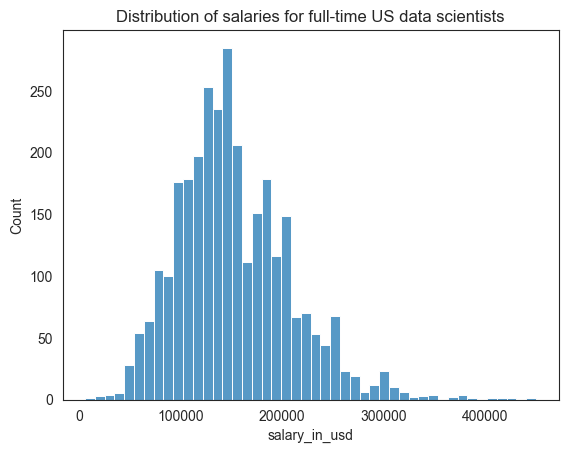

In [199]:
# More analysis for the salary for US employees

countUS = df_US['employment_type'].value_counts() # number of FT, CT, PT, FL employess in the US
print(countUS,"\n")

# Extract full-time US employmees data
df_US_FT=df_US[df_US['employment_type'] =='FT']

ranges=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]
counts = pd.cut(df_US_FT["salary_in_usd"], ranges).value_counts().rename('counts').reset_index()
print(counts,"\n")

# Use seaborn to plot a histogram for the salary distribution
sns.histplot(data=df_US_FT, x="salary_in_usd").set(title='Distribution of salaries for full-time US data scientists')
plt.show()